In [1]:
# Importando as bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [2]:
# Carregar a base de dados

path = kagglehub.dataset_download("marusagar/bank-customer-attrition-insights")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 307k/307k [00:00<00:00, 27.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1


['Bank-Customer-Attrition-Insights-Data.csv']

In [3]:
path = '/root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1'
df = pd.read_csv(path + '/Bank-Customer-Attrition-Insights-Data.csv')

## Propriedades dos dados:

In [4]:
# Verificando as linhas iniciais do dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
# Verificando todas as colunas com os tipos de dados e a quantidade de conteúdos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
# Redundante, sabemos da linha anterior que não temos linha nula
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


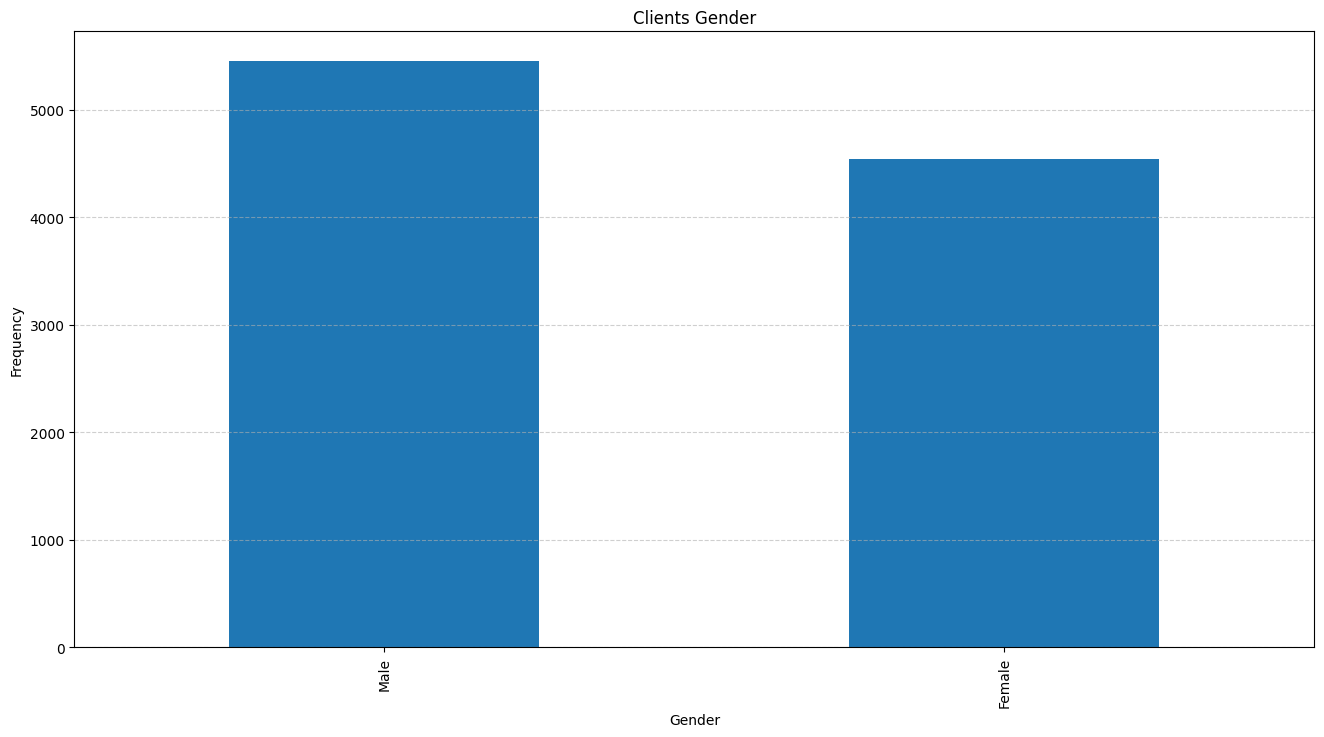

In [7]:
plt.figure(figsize=(16, 8))
plt.title('Clients Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
df['Gender'].value_counts().plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [36]:
contagem_genero = df['Gender'].value_counts().reset_index(name='Count')
contagem_genero.columns = ['Gender','Count']
contagem_genero

,Gender,Count
0,Male,5457
1,Female,4543


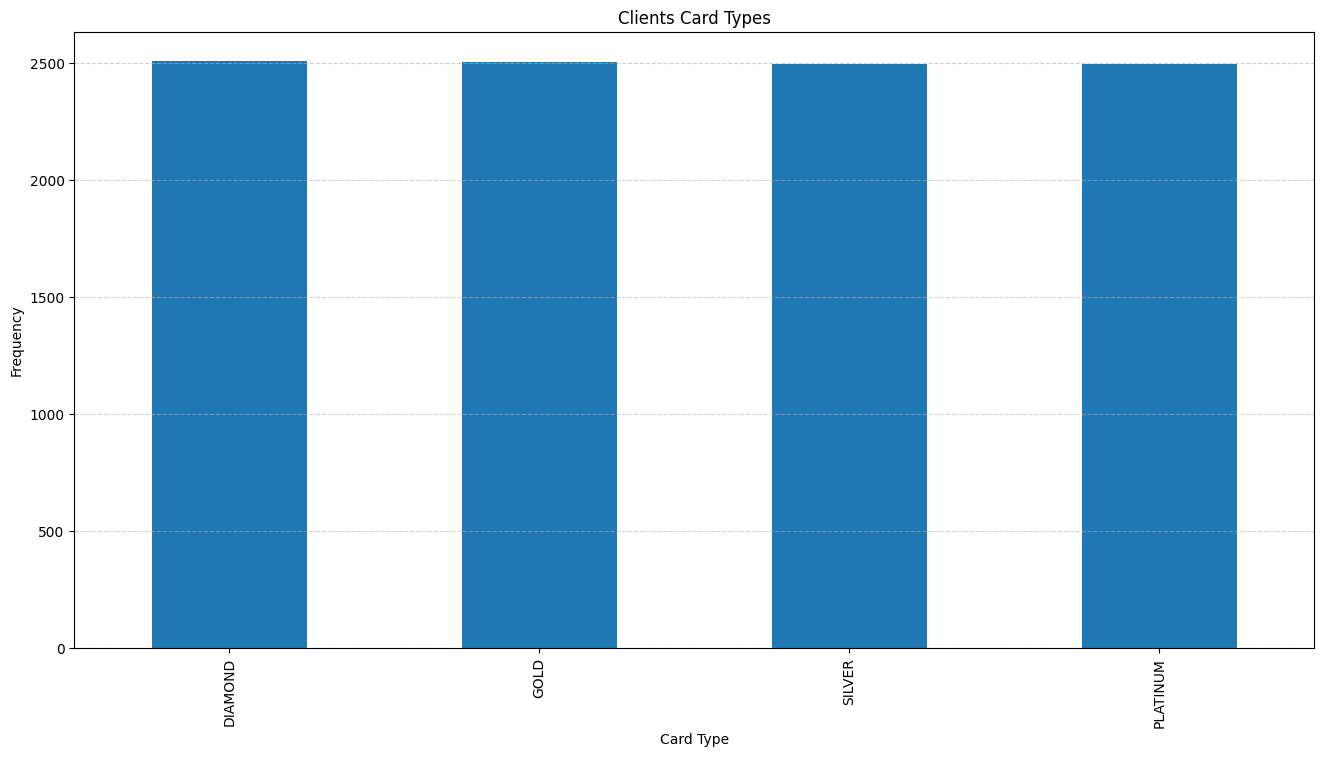

In [10]:
plt.figure(figsize=(16, 8))
plt.title('Clients Card Types')
plt.xlabel('Card Type')
plt.ylabel('Frequency')
df['Card Type'].value_counts().plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [11]:
contagem_tipo_cartao = df['Card Type'].value_counts().reset_index(name='Count')
contagem_tipo_cartao.columns = ['Card Type','Count']
contagem_tipo_cartao

,Card Type,Count
0,DIAMOND,2507
1,GOLD,2502
2,SILVER,2496
3,PLATINUM,2495


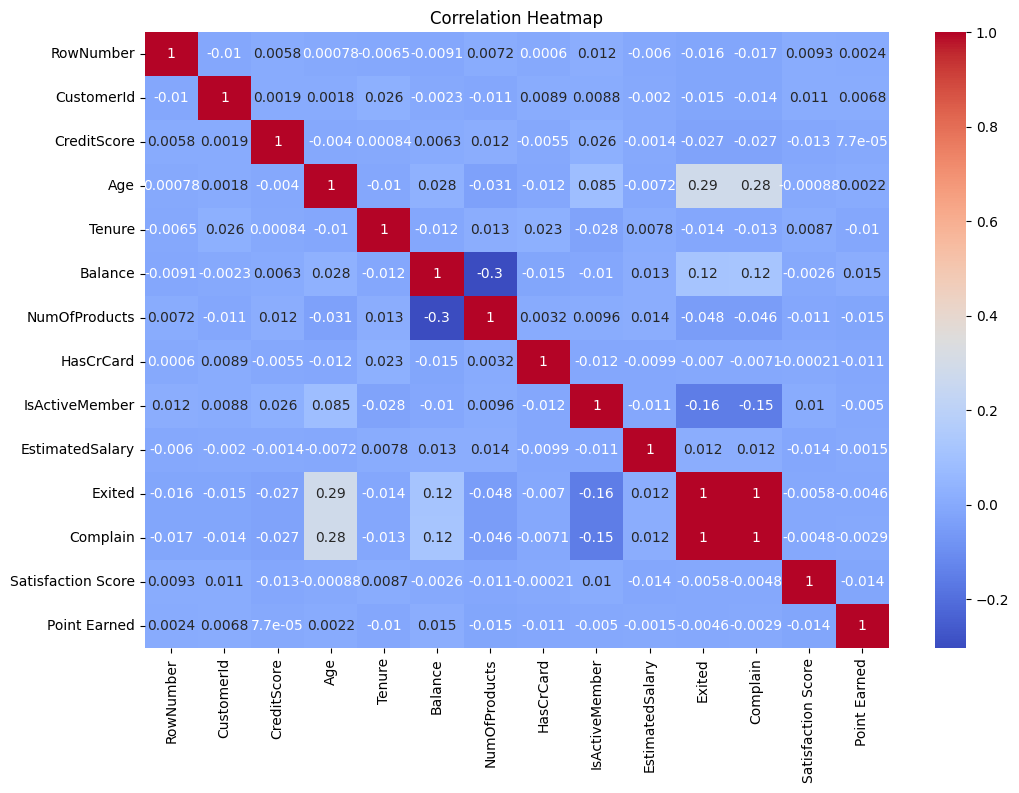

In [12]:
# Gerando mapa de calor

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

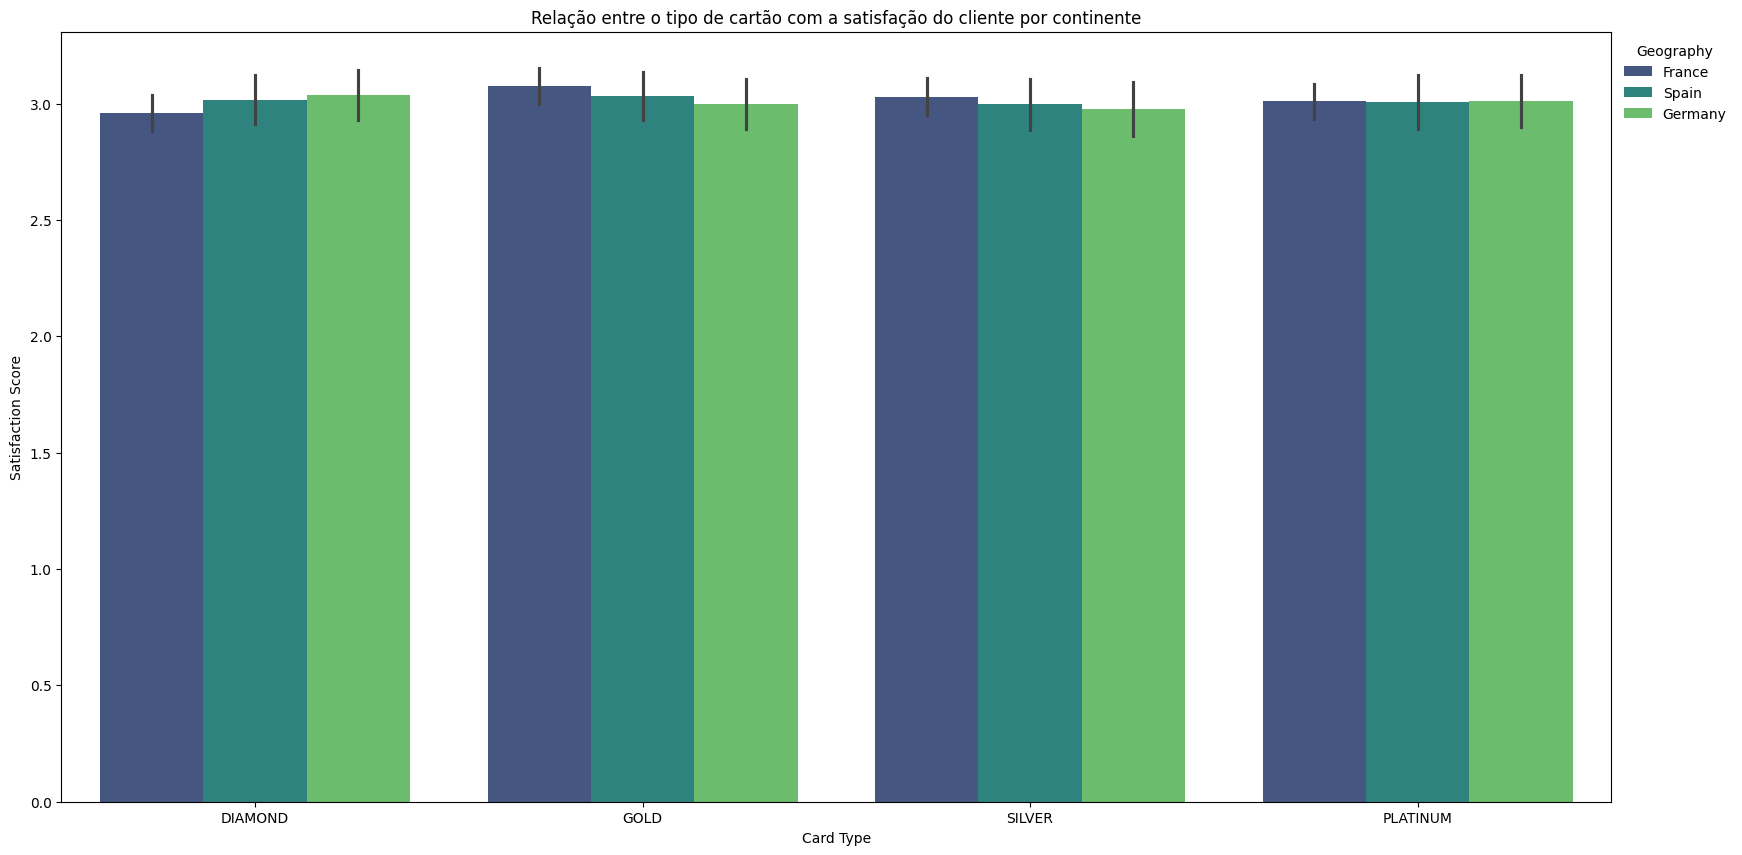

In [23]:
# Verificando a satisfação por tipo de cartão em cada país

plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Card Type', y='Satisfaction Score', hue='Geography', palette='viridis')
plt.title('Relação entre o tipo de cartão com a satisfação do cliente por continente')
plt.xlabel('Card Type')
plt.ylabel('Satisfaction Score')
plt.legend(title='Geography', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

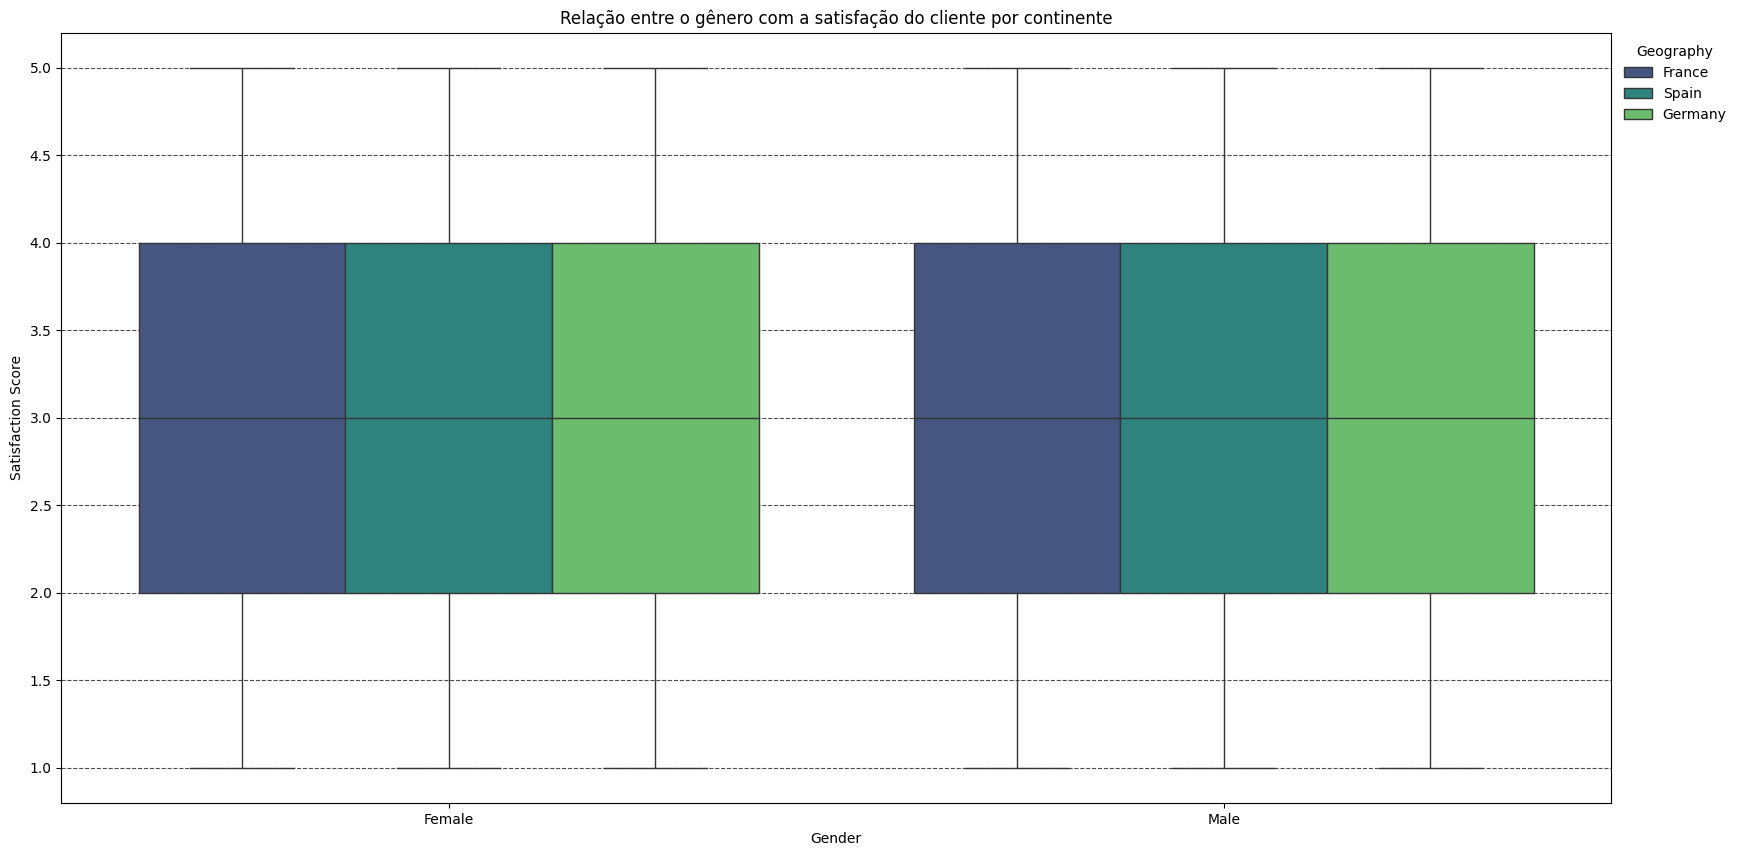

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Gender', y='Satisfaction Score', hue='Geography', palette='viridis')
plt.title('Relação entre o gênero com a satisfação do cliente por continente')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Score')
plt.legend(title='Geography', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
plt.show()

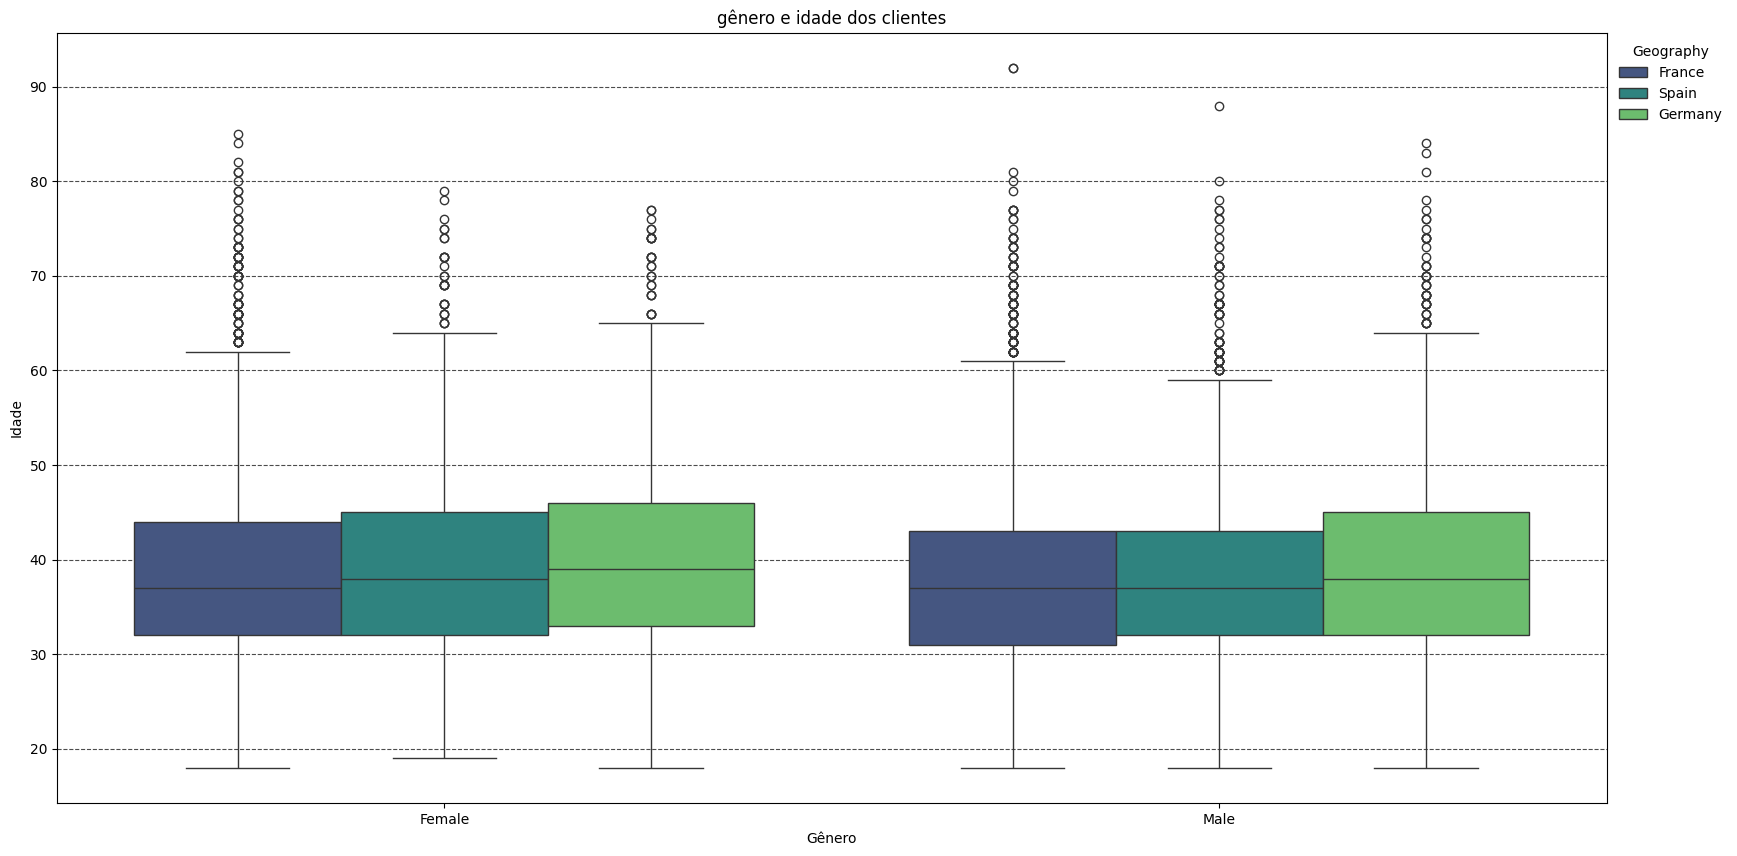

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Gender', y='Age', hue='Geography', palette='viridis')
plt.title('gênero e idade dos clientes')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.legend(title='Geography', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
plt.show()

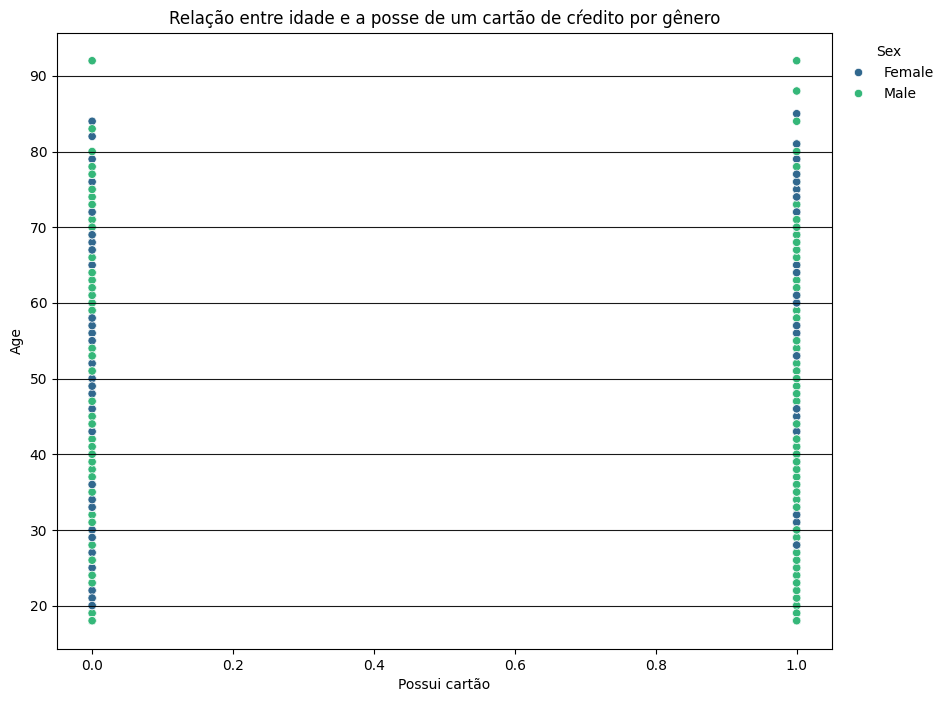

In [35]:
# Verificando a satisfação por tipo de cartão em cada país

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='HasCrCard', y='Age', hue='Gender', palette='viridis')
plt.title('Relação entre idade e a posse de um cartão de cŕedito por gênero')
plt.xlabel('Possui cartão')
plt.ylabel('Age')
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.grid(axis='y', color='black', alpha=0.9)
plt.show()